1.  **Data Loading**: We'll start by loading the data from the CSV files using `pandas`. This involves reading both the training and testing datasets.
    
2.  **Initial Exploration**: Once loaded, it's beneficial to perform an initial exploration to understand the basic properties of the dataset such as the number of features, rows, and if there are any missing values.
    
3.  **Data Cleaning**: Based on the initial exploration, we might need to handle missing data either by filling them with appropriate values (like mean, median) or by dropping the rows or columns depending entirely on how extensive the missing values are.
    
4.  **Feature Engineering**: Depending on the requirements or findings from the initial exploration, there may be a need for feature engineering. This could involve creating new features from existing ones, encoding categorical variables, or scaling/normalizing data.
    
5.  **Splitting the Data**: Since machine learning models require validation, the training data often needs to be split into a training set and a validation set. If the data isn't pre-split (as in having separate training and testing datasets), we'll perform this step.

In [3]:
# import pandas as pd

# train_df = pd.read_csv('data/train.csv')

# # chop first 1/2 of the data
# train_df = train_df.iloc[:len(train_df)//2]
# # save to new file
# train_df.to_csv('data/train_half.csv', index=False)

In [4]:
# change directory
import os
os.chdir('data')

FileNotFoundError: [Errno 2] No such file or directory: 'data'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Initial data exploration
print(train_df.head())
print(test_df.head())
print(train_df.describe())
print(train_df.isnull().sum())

# Data Cleaning (assuming no specific cleaning is mentioned or required)
# For example, fill missing values if any
# train_df.fillna(train_df.mean(), inplace=True)

# Feature Engineering
# For example, feature scaling
scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(train_df.iloc[:, :-1])  # Assuming last column is the target
test_df_scaled = scaler.transform(test_df.iloc[:, :-1])

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_df_scaled, 
    train_df.iloc[:, -1],  # Assuming the last column is the target variable
    test_size=0.2, 
    random_state=42
)

# The processed data is now in X_train, X_val, y_train, y_val for further modeling

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

Initial Exploration: Check the basic statistics of the dataset, look for missing values, and understand the distribution of data using describe() and info() functions.

## Basic info

In [ ]:
# Display the first few rows of the training dataset
print("Data head", train_df.head(), end="\n", sep='\n')


Data head
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fB

In [ ]:

# Basic information about the dataset
print("Data info", train_df.info(), end="\n", sep='\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB
Data info
None


In [ ]:

# Statistical summary of the dataset
print("Data description", train_df.describe(), end="\n", sep='\n')

Data description
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000     

In [ ]:
import pandas as pd
import numpy as np


# Display basic information
print("Shape of the dataset:", train_df.shape,
      "\nData types:\n", train_df.dtypes,
    "\nSummary statistics:\n", train_df.describe(), sep='\n')

# save output to a file
with open('basic_info.txt', 'w') as f:
    f.write("Shape of the dataset:\n{}\n\nData types:\n{}\n\nSummary statistics:\n{}".format(train_df.shape, train_df.dtypes, train_df.describe()))

Shape of the dataset:
(3676, 563)

Data types:

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

Summary statistics:

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        3676.000000        3676.000000        3676.000000   
mean            0.273549          -0.017366          -0.108545   
std             0.073506           0.031232           0.048867   
min            -1.000000          -0.684097          -1.000000   
25%             0.260979          -0.025503          -0.121979   
50%             0.277027          -0.017134          -0.108801   
75%             0.289022          -0.009772          -0.096425   
max             0.63151

In [ ]:
summary = train_df.describe()
print(summary)

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        3676.000000        3676.000000        3676.000000   
mean            0.273549          -0.017366          -0.108545   
std             0.073506           0.031232           0.048867   
min            -1.000000          -0.684097          -1.000000   
25%             0.260979          -0.025503          -0.121979   
50%             0.277027          -0.017134          -0.108801   
75%             0.289022          -0.009772          -0.096425   
max             0.631510           0.324130           0.543939   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       3676.000000       3676.000000       3676.000000       3676.000000   
mean          -0.589183         -0.475358         -0.587789         -0.615658   
std            0.447701          0.519191          0.429523          0.421250   
min           -1.000000         -0.999873         -0.999454         -1.000000   


In [ ]:
import json

# Assuming missing_values dictionary is already created
data_info = {
    'shape': train_df.shape,
    'data_types': train_df.dtypes.apply(lambda x: x.name).to_dict(),
    'columns': train_df.columns.to_list(),
    'index': train_df.index.to_list(),
    'info': train_df.info(),
    'head': train_df.head().to_dict(),
    'missing_values': train_df.isnull().sum().to_dict(),
    'duplicate_rows': train_df.duplicated().sum().item(),
    'unique_values': train_df.nunique().to_dict(),
    'summary': summary.to_dict() if isinstance(summary, (pd.Series, pd.DataFrame)) else summary,
    'shape': train_df.shape,
    'data_types': train_df.dtypes.apply(lambda x: x.name).to_dict(),
    'columns': train_df.columns.to_list(),
    'index': train_df.index.to_list(),
    'info': train_df.info(),
    'head': train_df.head().to_dict(),
    'tail': train_df.tail().to_dict(),
    'sample': train_df.sample().to_dict()
}


# Save the data_info dictionary to a JSON file
with open('data_info.json', 'w') as f:
    json.dump(data_info, f, indent=4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 15.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 15.8+ MB


In [ ]:
# build heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = train_df.drop(columns='Activity').corr()

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap

# save as json
correlation_matrix.to_json('correlation_matrix.json')

                                      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  \
tBodyAcc-mean()-X                              1.000000          -0.025440   
tBodyAcc-mean()-Y                             -0.025440           1.000000   
tBodyAcc-mean()-Z                             -0.135474           0.113403   
tBodyAcc-std()-X                              -0.007413          -0.055010   
tBodyAcc-std()-Y                              -0.024668          -0.063750   
...                                                 ...                ...   
angle(tBodyGyroJerkMean,gravityMean)           0.023072           0.065380   
angle(X,gravityMean)                          -0.058537          -0.028196   
angle(Y,gravityMean)                           0.038036          -0.020884   
angle(Z,gravityMean)                           0.063841           0.000435   
subject                                        0.025737           0.014468   

                                      tBodyAcc-mean()-Z  tBodyA

In [ ]:

# what was the correlation between the first and the last column?
print(correlation_matrix.iloc[0, -1])

0.02573676336072793


In [2]:
# use json data to generate heatmap
correlation_matrix = pd.read_json('correlation_matrix.json')
sns.heatmap(correlation_matrix, annot=True)
plt.show()


NameError: name 'pd' is not defined

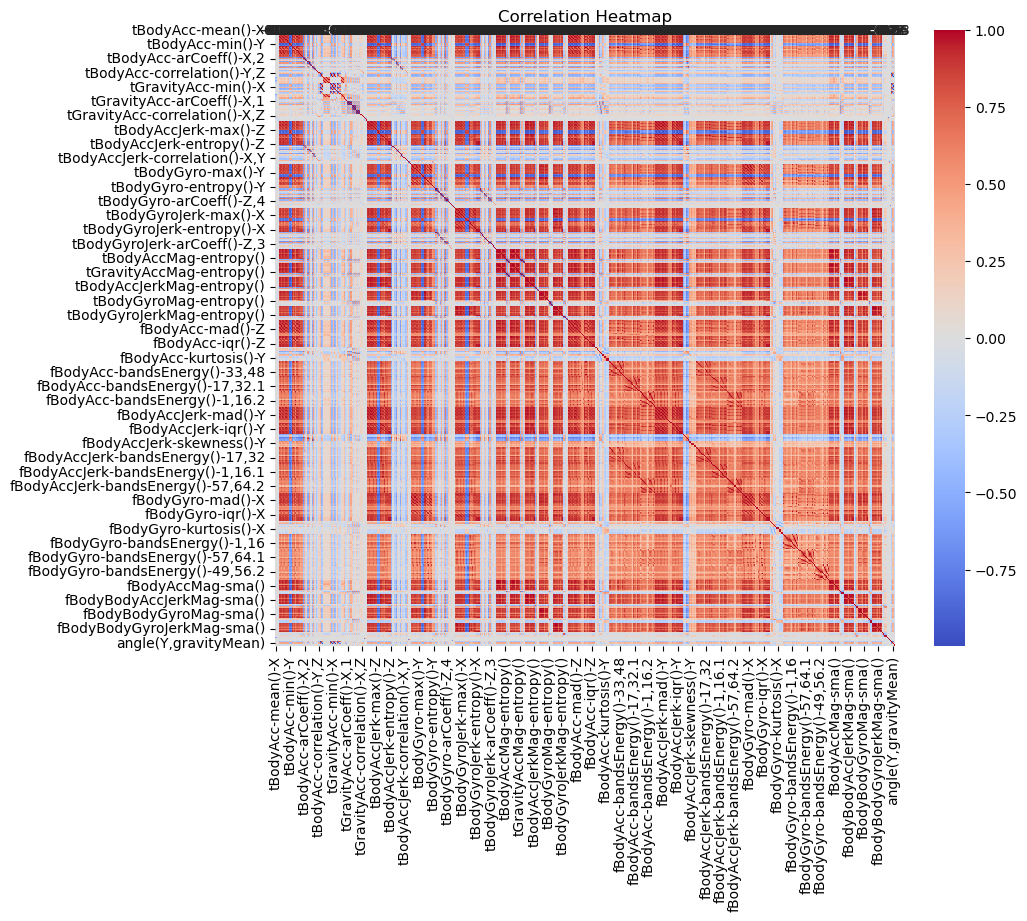

<Figure size 640x480 with 0 Axes>

In [63]:
## plot the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# save the heatmap
plt.savefig('data_analysis/correlation_heatmap.png')
